In [1]:
import os

os.chdir('..')

In [2]:
import csv

import networkx as nx
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from IPython.display import Image, IFrame
from networkx.algorithms.centrality import betweenness_centrality
from networkx.algorithms.centrality import closeness_centrality
from networkx.algorithms.cluster import clustering
from networkx.classes.function import density


from impl.config import NODES, EDGES
from impl.util import find_most_central_nodes, print_centrality_measure_info
from impl.util.PlotUtil import PlotUtil

# Exercise 1

## (a) Draw the network by hand

In [3]:
G = nx.Graph()
G.add_nodes_from(NODES)
G.add_edges_from(EDGES)

In [4]:
fig = PlotUtil.plot_graph_plotly(G, 'Exercise 1 graph', nx.spring_layout)

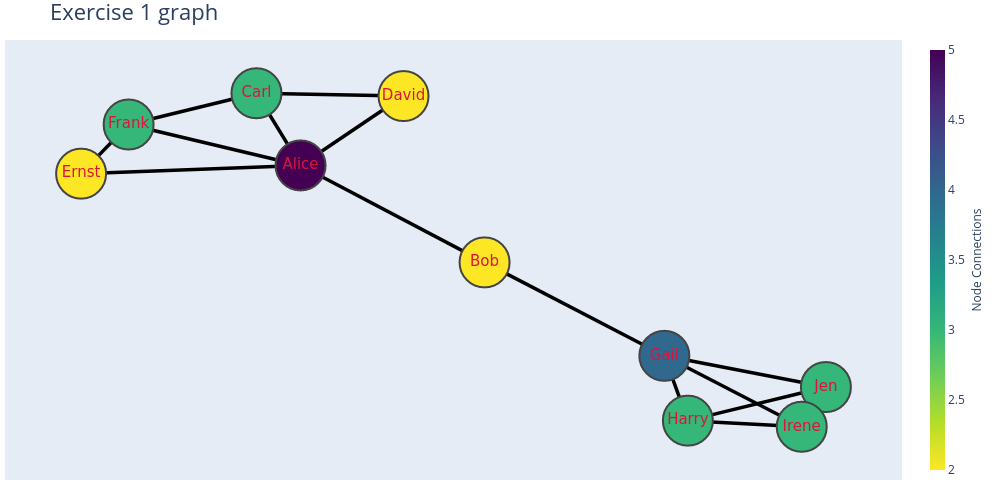

In [5]:
image_bytes = fig.to_image(format='png', width=1000, height=500, scale=1)
Image(image_bytes)

## (b) How many nodes are in graph?

In [6]:
print(f'Number of nodes in the network: {len(G.nodes)}')

Number of nodes in the network: 10


## (c) What is the density of the network?

The density for undirected graphs is:
$$d=\cfrac{2\,m}{n\,(n-1)},$$
where $n$ is the number of nodes and $m$ is the number of edges in graph $G$. Network density helps us understand how connected the network is compared to how connected it might be. The more connections exist (out of all possible), the higher the density is.


In [7]:
print(f'Network density: {density(G)}')

Network density: 0.3333333333333333


## (d) Calculate the degree of each node. Who is the most central node according to this measure?

The node degree is the number of edges adjacent to the node.

For Alice this measure equals 5, because she is adjacent to: Bob, Carl, David, Ernst, Frank.

In [8]:
node_degree_dict = {node: G.degree(node) for node in G.nodes()}
degree_max_nodes = find_most_central_nodes(node_degree_dict)

print_centrality_measure_info(node_degree_dict, degree_max_nodes, 'Degree of each node:')

'Degree of each node:'
{'Alice': 5,
 'Bob': 2,
 'Carl': 3,
 'David': 2,
 'Ernst': 2,
 'Frank': 3,
 'Gail': 4,
 'Harry': 3,
 'Irene': 3,
 'Jen': 3}
'Who is the most central node:'
['Alice']


## (e) Calculate the clustering of each node. Who is the most central node according to this measure?

For unweighted graphs, the clustering of a node $u$ is the fraction of possible traingles through that node that exist, i.e.:
$$c_u = \cfrac{2\, T(u)}{k\,(k-1)},$$
where $T(u)$ is the number of traingles through node $u$ and $k$ is the degree of $u$.

For Alice: $T(Alice) = 3$, $k=5$, so $c_{Alice}=\cfrac{6}{20}=0.3$.

In [9]:
local_clustering_dict = clustering(G)
local_clustering_max_nodes = find_most_central_nodes(local_clustering_dict)

print_centrality_measure_info(local_clustering_dict,
                              local_clustering_max_nodes,
                             'Clustering of each node:')

'Clustering of each node:'
{'Alice': 0.3,
 'Bob': 0,
 'Carl': 0.6666666666666666,
 'David': 1.0,
 'Ernst': 1.0,
 'Frank': 0.6666666666666666,
 'Gail': 0.5,
 'Harry': 1.0,
 'Irene': 1.0,
 'Jen': 1.0}
'Who is the most central node:'
['David', 'Ernst', 'Harry', 'Jen', 'Irene']


## (f) Calculate the closeness centrality for each node. Who is the most central node according to this measure?

Closeness centrality of a node $u$ is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances: $n-1$:
$$C(u) = \cfrac{n-1}{\displaystyle\sum_{v=1}^{n-1}d(v,u)},$$
where $d(v,u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the graph.

For Alice: $\displaystyle\sum_{v=1}^{n-1}d(v,Alice)=5*1+2+3*3=16$, so $C(Alice)=\cfrac{9}{16}=0.5625$

In [10]:
closeness_centrality_dict = closeness_centrality(G)
closeness_centrality_max_nodes = find_most_central_nodes(closeness_centrality_dict)

print_centrality_measure_info(closeness_centrality_dict,
                             closeness_centrality_max_nodes,
                             'Closeness centrality of each node:')

'Closeness centrality of each node:'
{'Alice': 0.5625,
 'Bob': 0.5625,
 'Carl': 0.4090909090909091,
 'David': 0.391304347826087,
 'Ernst': 0.391304347826087,
 'Frank': 0.4090909090909091,
 'Gail': 0.5,
 'Harry': 0.375,
 'Irene': 0.375,
 'Jen': 0.375}
'Who is the most central node:'
['Alice', 'Bob']


## (g) Calculate the betweenness centrality of each node. Who is the most central node according to this measure?

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:
$$c_B(v) = \displaystyle\sum_{s,t\in V}\cfrac{\sigma(s,t|v)}{\sigma(s,t)}$$
where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$ paths, and $\sigma(s,t|v)$ is the number of those paths passing through some node v other than $s,t$.

For Alice (the components of sum are): Frank--David = 0.5, Ernst--Carl = 0.5, Ernst--David = 1, Frank -- {Bob, Carl, Jen, Irene, Harry} = 5, Carl -- ... = 5, Ernst -- ... = 5, David -- ... = 5. 

The sum equals to 22.

In [11]:
betweenness_centrality_dict = betweenness_centrality(G, normalized=False)
betweenness_centrality_max_nodes = find_most_central_nodes(betweenness_centrality_dict)

print_centrality_measure_info(betweenness_centrality_dict,
                             betweenness_centrality_max_nodes,
                             'Betweenness centrality of each node:')

'Betweenness centrality of each node:'
{'Alice': 22.0,
 'Bob': 20.0,
 'Carl': 0.5,
 'David': 0.0,
 'Ernst': 0.0,
 'Frank': 0.5,
 'Gail': 18.0,
 'Harry': 0.0,
 'Irene': 0.0,
 'Jen': 0.0}
'Who is the most central node:'
['Alice']


# Exercise 2

## (a) prepare a CSV file with the edge list

In [12]:
header = ['node_1', 'node_2']
with open(os.path.join('l1', 'data', 'csv', 'adjacency_list.csv'), 'w') as file:
    write = csv.writer(file)
    write.writerow(header)
    write.writerows(EDGES)

In [13]:
print('Saved .csv file:')
pd.read_csv(os.path.join('l1', 'data', 'csv', 'adjacency_list.csv'))

Saved .csv file:


node_1 node_2
0   Alice    Bob
1    Carl  Alice
2   Alice  David
3   Alice  Ernst
4   Alice  Frank
5     Bob   Gail
6    Gail  Harry
7   Harry    Jen
8     Jen   Gail
9   Harry  Irene
10  Irene   Gail
11  Irene    Jen
12  Ernst  Frank
13  David   Carl
14   Carl  Frank

## (b) visualize the network by making use of the Gephi software

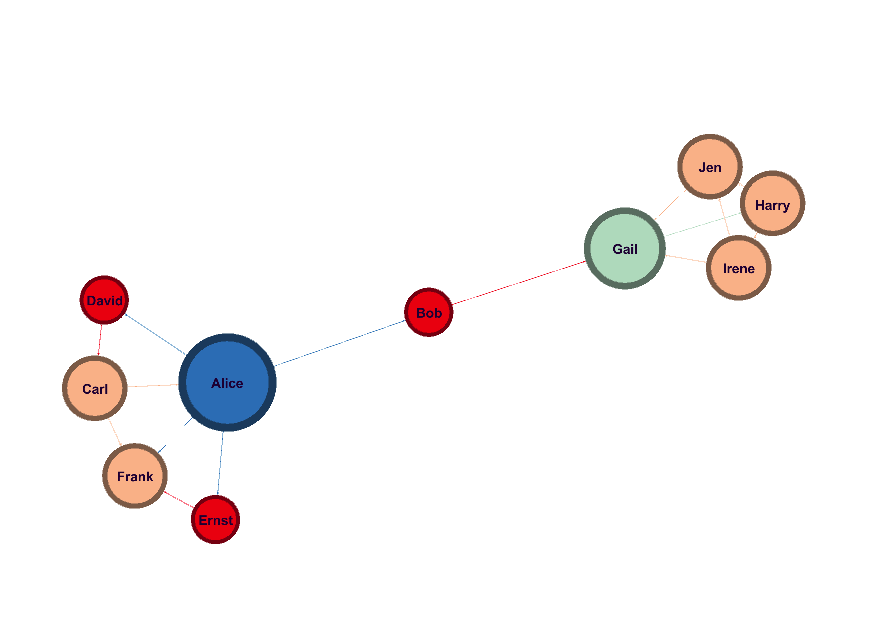

In [14]:
Image(os.path.join('l1', 'data', 'png', 'graph_screenshot.png'))

## (c) calculate the basic network measures within Gephi

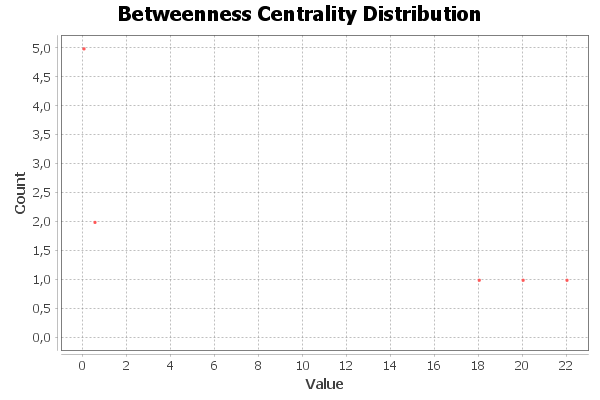

In [15]:
Image(os.path.join('l1', 'data', 'png', 'Betweenness Centrality Distribution.png'))

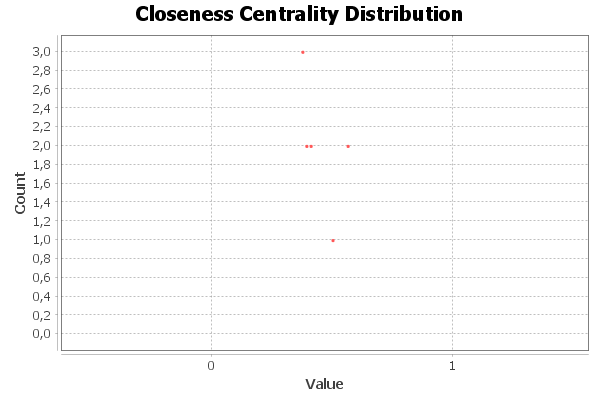

In [16]:
Image(os.path.join('l1', 'data', 'png', 'Closeness Centrality Distribution.png'))

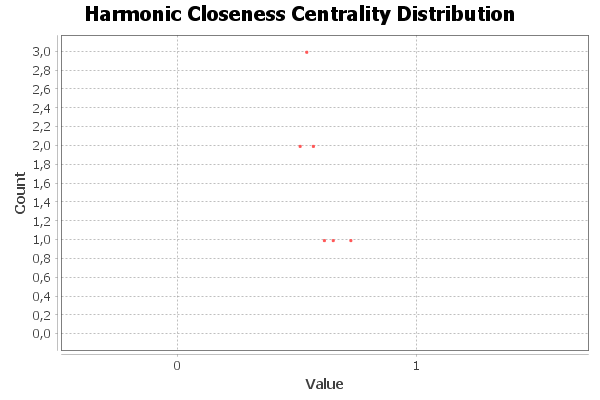

In [17]:
Image(os.path.join('l1', 'data', 'png', 'Harmonic Closeness Centrality Distribution.png'))

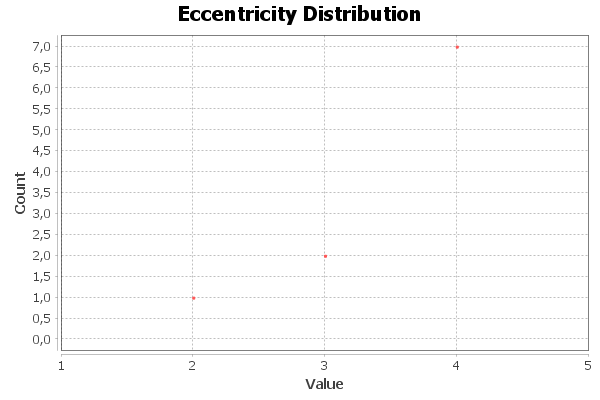

In [18]:
Image(os.path.join('l1', 'data', 'png', 'Eccentricity Distribution.png'))

# Exercise 3

We are given undirected unweighted network of size N. It may be represented through adjacency matrix $A \in R^{N \times N}$. We assume that there are no self-loops in the network.

Let $e$ be a column vector of $N$ elements all equal to 1, i.e. $e=(1,1,\ldots, 1)^T$.

Write expressions for or answer question by making use of the above quantities.

In [19]:
A = nx.linalg.graphmatrix.adjacency_matrix(G)
A = A.todense()

In [20]:
e = np.ones(10).reshape(1, -1).T

In [21]:
k = np.matmul(A, e).T

print('Number of neighbours:')
dict(zip(list(G.nodes()), k.tolist()[0]))

Number of neighbours:


{'Alice': 5.0,
 'Carl': 3.0,
 'Bob': 2.0,
 'David': 2.0,
 'Ernst': 2.0,
 'Frank': 3.0,
 'Gail': 4.0,
 'Harry': 3.0,
 'Jen': 3.0,
 'Irene': 3.0}

## (b) find the total number $L$ of links in the network.

**Answer:** $\frac{1}{2}\,e^TA\,e$

In [22]:
ans = int(0.5 * np.matmul(e.T, np.matmul(A, e)))

In [23]:
ans

15

## (c) find matrix $N$ whose elemnt $n_{ij}$ is equal to the number of common neighbors of nodes i and j.

**Answer:** $N = A^2$

In [24]:
np.matmul(A, A)

matrix([[5., 2., 0., 1., 1., 2., 1., 0., 0., 0.],
        [2., 3., 1., 1., 2., 1., 0., 0., 0., 0.],
        [0., 1., 2., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 2., 1., 2., 0., 0., 0., 0.],
        [1., 2., 1., 1., 2., 1., 0., 0., 0., 0.],
        [2., 1., 1., 2., 1., 3., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 4., 2., 2., 2.],
        [0., 0., 1., 0., 0., 0., 2., 3., 2., 2.],
        [0., 0., 1., 0., 0., 0., 2., 2., 3., 2.],
        [0., 0., 1., 0., 0., 0., 2., 2., 2., 3.]])

## (d) find the number T of traingles present in the network.

**Answer:**  $T = \cfrac{tr(A^3)}{6}$

In [25]:
T = np.trace(np.matmul(np.matmul(A, A), A))//6
T

7.0

## (e) how would you determine whether the network is connected only by looking at the adjacency matrix?

**Answer:** I would check the diagonal of $A^2$ matrix. If it contains any 0, that means that the graph is not connected. Let's validate that on examples. First, the connected graph from exercise 1.

In [26]:
sq = np.matmul(A, A)
sq.diagonal()

matrix([[5., 3., 2., 2., 2., 3., 4., 3., 3., 3.]])

**Note:** The diagonal of $A^2$ does not contain any zeros, which means the graph is connected.

In [27]:
G1 = nx.Graph()
G1.add_nodes_from(np.arange(5))
G1.add_edges_from([[0, 1],
                 [0,2],
                 [1,2],
                 [2,3],
                 [3,1]])

In [28]:
fig = PlotUtil.plot_graph_plotly(G1, 'Example of not connected graph', nx.kamada_kawai_layout)

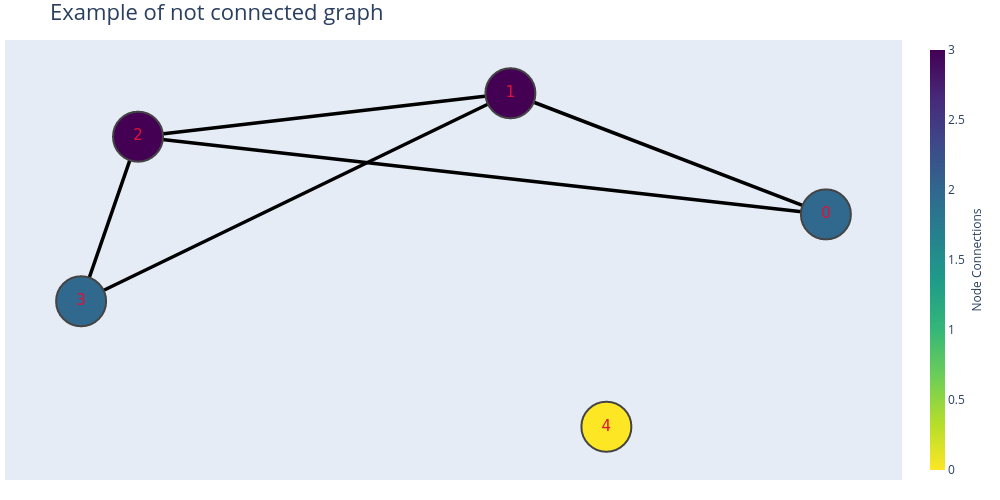

In [29]:
image_bytes = fig.to_image(format='png', width=1000, height=500, scale=1)
Image(image_bytes)

In [30]:
A1 = nx.linalg.graphmatrix.adjacency_matrix(G1)
A1 = A1.todense()

In [31]:
np.matmul(A1, A1).diagonal()

matrix([[2., 3., 3., 2., 0.]])

**Note:** The validation seems successful. The last value of $A^2$ diagonal is 0, which indicates that the node `4` is not connected, which can be also seen from the graph above.